# ARAS Datasets
H. Alemdar, H. Ertan, O.D. Incel, C. Ersoy, ARAS Human Activity Datasets in Multiple Homes with Multiple Residents, Pervasive Health, Venice, May 2013. 

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
import pyadlml
import requests
import plotly
plotly.offline.init_notebook_mode(connected=True)

from pyadlml.dataset import set_data_home, fetch_aras
set_data_home('/home/chris/code/adlml/data_home')
data = fetch_aras(cache=True, keep_original=True)

In [2]:
data.df_activities.head()

,start_time,end_time,activity
0,2000-01-01 00:00:00,2000-01-01 00:08:49,Watching TV
1,2000-01-01 00:09:03,2000-01-01 00:14:00,Talking on the Phone
2,2000-01-01 00:14:05,2000-01-01 00:56:09,Watching TV
3,2000-01-01 00:56:18,2000-01-01 00:59:01,Brushing Teeth
4,2000-01-01 01:00:00,2000-01-01 01:04:05,Toileting


In [3]:
data.df_activities_res2.head()

,start_time,end_time,activity
0,2000-01-01 00:00:00,2000-01-01 00:43:29,Using Internet
1,2000-01-01 00:43:42,2000-01-01 00:49:49,Toileting
2,2000-01-01 00:50:02,2000-01-01 01:15:56,Using Internet
3,2000-01-01 01:16:07,2000-01-01 06:23:08,Sleeping
4,2000-01-01 06:23:09,2000-01-01 06:30:37,Shaving


In [4]:
data.df_devices.head()

,time,device,val
0,2000-01-01 00:00:10,So1,1
1,2000-01-01 00:00:11,So1,0
2,2000-01-01 00:00:40,Ir1,1
3,2000-01-01 00:00:44,Ir1,0
4,2000-01-01 00:00:48,Fo1,1


# Activities: Subject 1

In [5]:
print('There are', len(data.df_activities['activity'].unique()), 'activities recorded')

There are 26 activities recorded


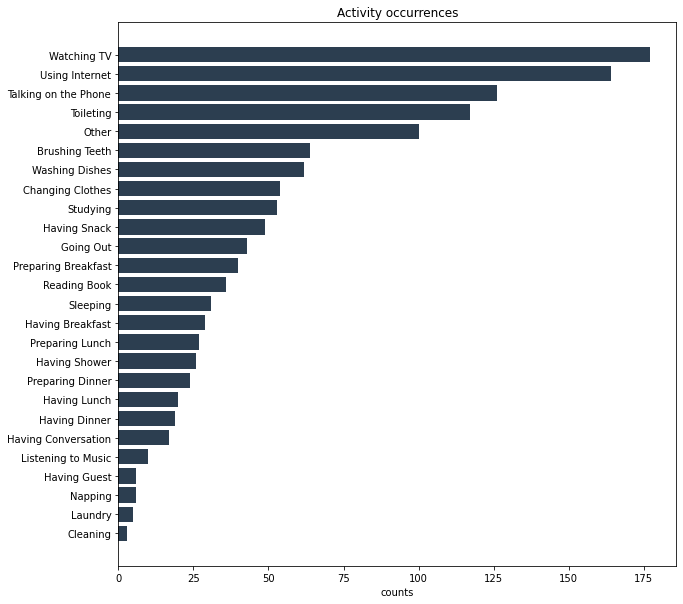

In [6]:
from pyadlml.dataset.plot.activities import hist_counts

idle = False
hist_counts(data.df_activities, idle=idle);

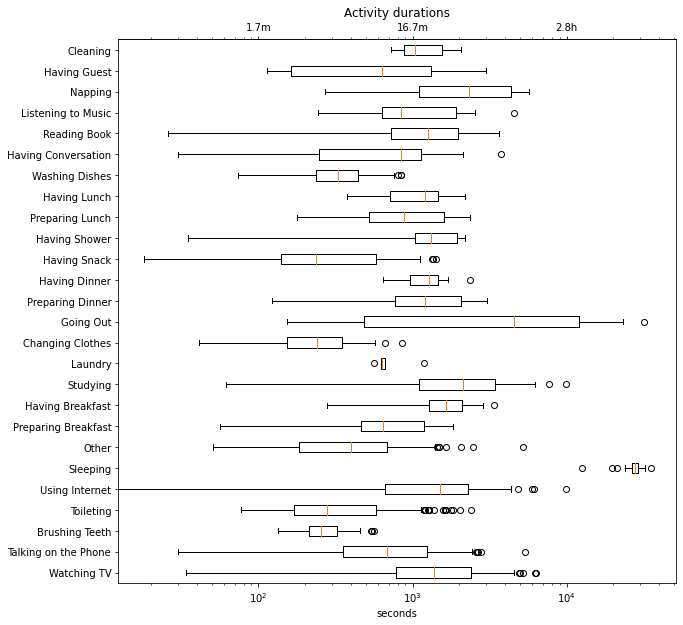

In [7]:
from pyadlml.dataset.plot.activities import boxplot_duration

idle = False
boxplot_duration(data.df_activities, idle=idle);

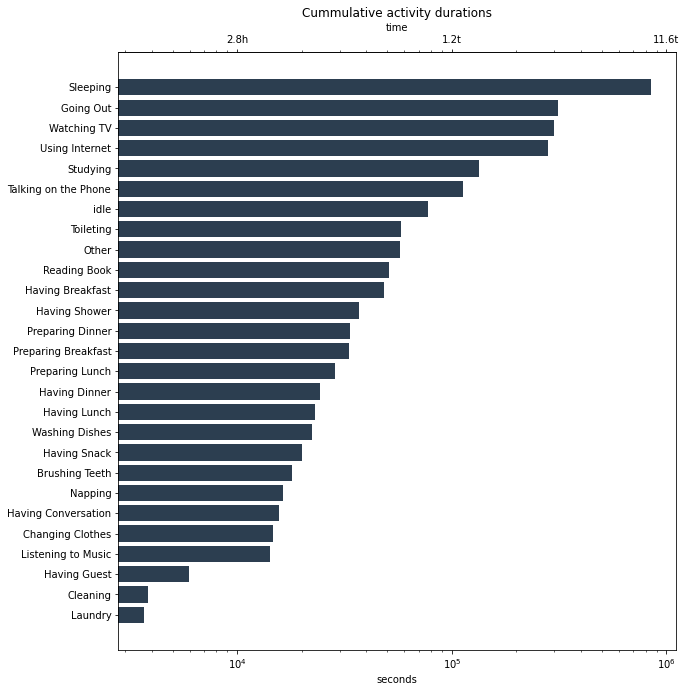

In [8]:
from pyadlml.dataset.plot.activities import hist_cum_duration

idle = True
y_scale = 'log'

hist_cum_duration(data.df_activities, y_scale=y_scale, idle=idle);

#### Transition Heatmap
$x_{72}$ should be read as first used the toilet and after that went to bed for a total of 46 times

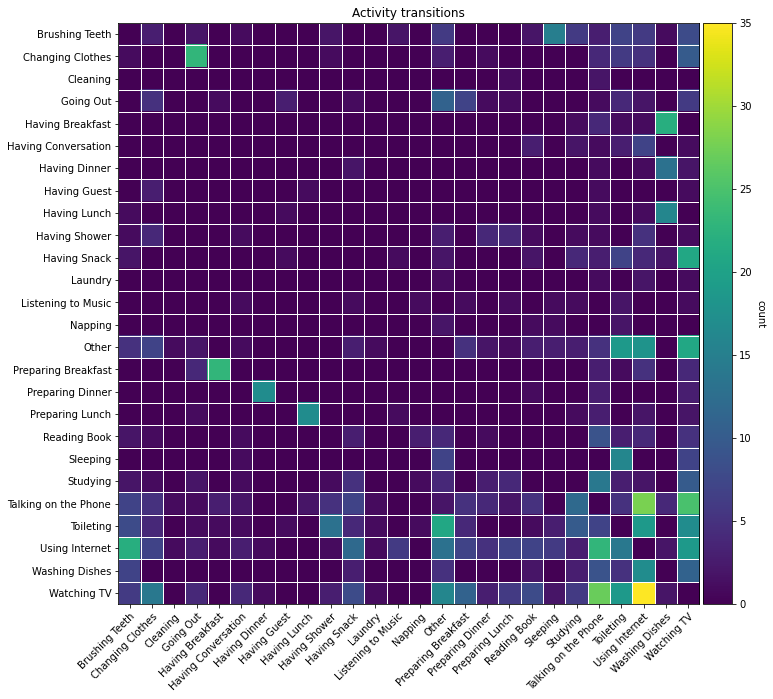

In [9]:
from pyadlml.dataset.plot.activities import heatmap_transitions

idle = False
z_scale = None #'log'
grid=True
numbers=False
heatmap_transitions(data.df_activities, z_scale=z_scale, idle=idle, 
                    grid=grid, numbers=numbers);

## Activities: Subject 2
 

In [10]:
print('There are', len(data.df_activities_res2['activity'].unique()), 'activities recorded.')

There are 23 activities recorded.


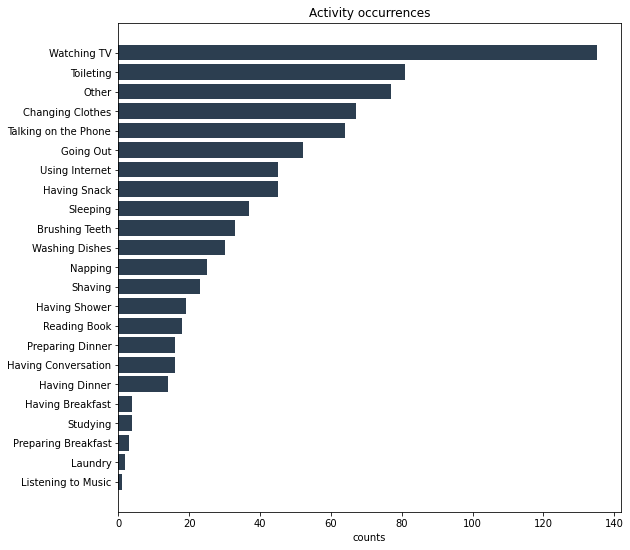

In [11]:
from pyadlml.dataset.plot.activities import hist_counts

idle = False
hist_counts(data.df_activities_res2, idle=idle);

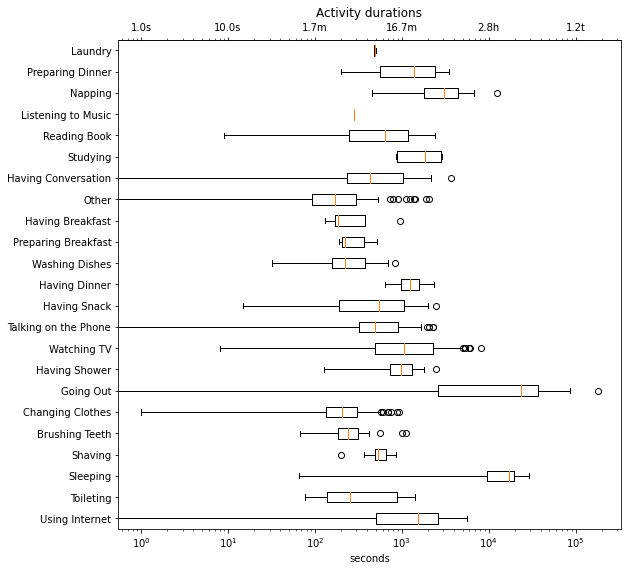

In [12]:
from pyadlml.dataset.plot.activities import boxplot_duration

idle = False

boxplot_duration(data.df_activities_res2, idle=idle);

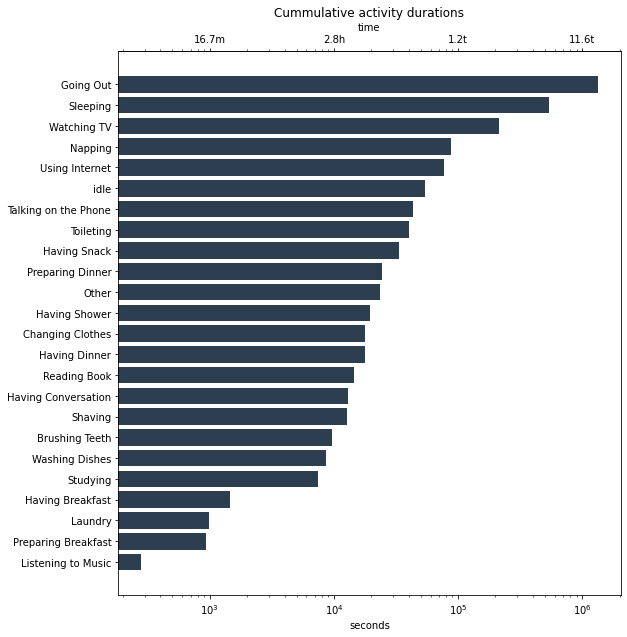

In [13]:
from pyadlml.dataset.plot.activities import hist_cum_duration

idle = True
y_scale = 'log'
hist_cum_duration(data.df_activities_res2, y_scale=y_scale, idle=idle);

#### Transition Heatmap
$x_{72}$ should be read as first used the toilet and after that went to bed for a total of 46 times

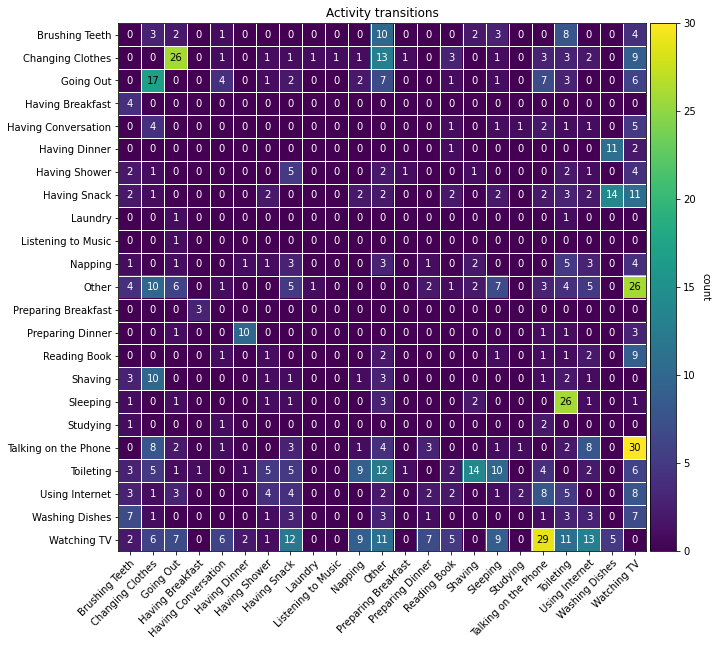

In [14]:
from pyadlml.dataset.plot.activities import heatmap_transitions

idle = False
z_scale = None #'log'
heatmap_transitions(data.df_activities_res2, z_scale=z_scale, idle=idle);

## Devices

In [15]:
print('There are', len(data.df_devices['device'].unique()), 'devices recorded.')

There are 20 devices recorded.


In [16]:
from pyadlml.dataset.devices import device_rep1_2_rep2
rep2_nodrop, syn_acts = device_rep1_2_rep2(data.df_devices, drop=False)
rep2_drop = device_rep1_2_rep2(data.df_devices, drop=True)

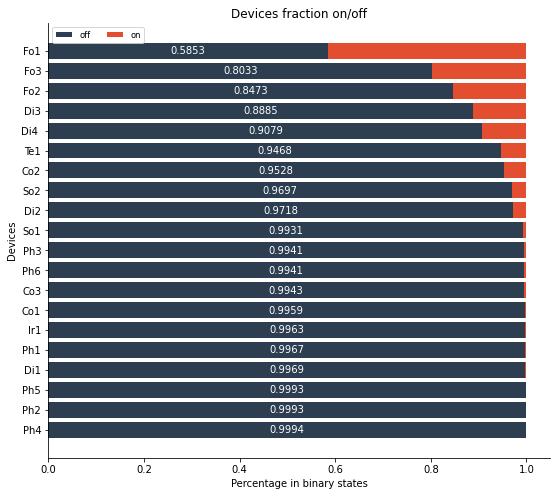

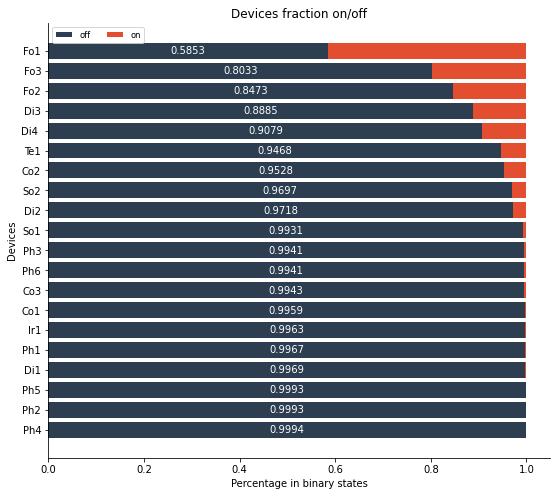

In [17]:
from pyadlml.dataset.plot.devices import hist_on_off
hist_on_off(rep2_nodrop)

In [18]:
from pyadlml.dataset.plot.devices import boxsplot_on_duration
boxsplot_on_duration(rep2_nodrop);

ImportError: cannot import name 'boxsplot_on_duration' from 'pyadlml.dataset.plot.devices' (../../pyadlml/dataset/plot/devices.py)

In [ ]:
from pyadlml.dataset.plot.devices import heatmap_trigger_one_day
heatmap_trigger_one_day(data.df_devices, t_res='10m');

In [ ]:
from pyadlml.dataset.stats.devices import duration_correlation_parallel
ct = duration_correlation_parallel(data.df_devices)

In [ ]:
heatmap_cross_correlation(dur_corr=ct, figsize=(11,11))

In [ ]:
from pyadlml.dataset.plot.devices import heatmap_cross_correlation
heatmap_cross_correlation(data.df_devices)

In [ ]:
from pyadlml.dataset.plot.devices import hist_trigger_time_diff
hist_trigger_time_diff(data.df_devices);

In [ ]:
from pyadlml.dataset.plot.devices import hist_counts
hist_counts(data.df_devices, y_scale='log', figsize=(10,9));

The distribution of triggers is also exponentially decaying for some devices e.g the Washingmaschine is used a lot less than the Hall-Bathroom door.

# Activites Person 1 ~ Devices


### Triggers
Lets look at the connection between the activities and the device activations.

In [ ]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
import pyadlml
import requests
import plotly
plotly.offline.init_notebook_mode(connected=True)

from pyadlml.dataset import set_data_home, fetch_aras
set_data_home('/home/chris/code/adlml/data_home')
data = fetch_aras(cache=True, keep_original=True)

In [ ]:
from pyadlml.dataset.stats import contingency_table_triggers, contingency_intervals, contingency_table_triggers_01
con_trigg = contingency_table_triggers(data.df_devices, data.df_activities)
con_trigg_01 = contingency_table_triggers_01(data.df_devices, data.df_activities)
con_int = contingency_intervals(data.df_devices, data.df_activities)

In [ ]:
from pyadlml.dataset.plot import heatmap_contingency_triggers

idle = True
z_scale = 'log'
heatmap_contingency_triggers(con_tab=con_trigg, idle=idle, z_scale=z_scale)#, numbers=False)

In [ ]:
from pyadlml.dataset.plot import heatmap_contingency_triggers_01

idle = True
z_scale = 'log'
numbers=True
heatmap_contingency_triggers_01(con_tab_01=con_trigg_01, z_scale=z_scale, idle=idle, numbers=numbers, figsize=(14,13));

Sadly the different states of a device don't convey much information. It would have been nice if an activity is only involved with a single device transition.

## Duration

the overlap of the intervals is also interesting.

In [ ]:
from pyadlml.dataset.plot import heatmap_contingency_overlaps

z_scale='log'
idle=True
heatmap_contingency_overlaps(con_tab=con_int, z_scale=z_scale, idle=idle, figsize=(17,13), numbers=False)

# Representations

There are different ways to represent our data. One way is to discretize the data into intervals.

- RAW representation _____|^^^^^^|______  
    is 1 whenever the sensor is 'on' and 0 otherwise 

- Changepoint representation ______|________|______  
    sensor gives a 1 to timeslices where the sensor reading changes

- LastFired representation ______|^^^^^^^^^  
    last sensor that changed state gives cont. 1

- Lagged representation
    the 

## RAW - representation

In [ ]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
import pyadlml
import requests

from pyadlml.datasets import set_data_home, fetch_aras
set_data_home('/home/chris/code/adlml/data_home')

data = fetch_aras(cache=True, keep_original=True)

In [ ]:
from pyadlml.preprocessing import DiscreteEncoder
enc_raw = DiscreteEncoder(rep="raw")
raw = enc_raw.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import RawEncoder

enc_raw = RawEncoder()
raw = enc_raw.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(raw)

In [ ]:
from pyadlml.datasets import set_parallel

In [ ]:
set_parallel(True)
%time lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
set_parallel(False)
%time lbls = enc_lbl.fit_transform(data.df_activities)

- with dask  
    17.7 s ± 253 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
- without dask  
    Wall time: 1min 10s

In [ ]:
import numpy as np

def check_raw_undiscretized(raw):
    # should not contain any  nan values
    assert not raw.isnull().values.any()
    
    # rows can only differ in one number
    for i in range(1, len(raw)):
        assert 1 == np.abs(np.sum(raw.iloc[i-1].values - raw.iloc[i].values))
    
check_raw_undiscretized(raw)

In [ ]:
def check_raw(raw):
    # should not contain any  nan values
    assert not raw.isnull().values.any()
    
check_raw(raw)

In [ ]:
from pyadlml.dataset.plot.raw import hist_activities

hist_activities(enc_lbl.inverse_transform(lbls), 
                scale='log')#, figsize=(10,10))

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'raw'

heatmap_contingency_01(raw, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(raw);

In [ ]:
# TODO sth. is wrong here
#from pyadlml.dataset.plot.raw import corr_devices_01
#corr_devices_01(raw)

## Changepoint - representation
Raw: _____|^^^^^^|______  

CP :  ______|________|______  

sensor gives a 1 to timeslices where the sensor reading changes

In [ ]:
from pyadlml.preprocessing import ChangepointEncoder

idle = True
t_res = '60s'

cp_enc = ChangepointEncoder(t_res=t_res)
cp = cp_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(cp, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_changepoint(cp):
    # should not contain any  nan values
    assert not cp.isnull().values.any()

check_changepoint(cp)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'Changepoint'

heatmap_contingency_01(cp, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(cp);

## LastFired - representation
______|^^^^^^^^^  

last sensor that changed state gives cont. 1

In [ ]:
from pyadlml.preprocessing import LastFiredEncoder

t_res = '60s'
idle=True

lf_enc = LastFiredEncoder(t_res=t_res)
lf = lf_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(lf, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_lastfired(lf):
    # should not contain any  nan values
    assert not lf.isnull().values.any()
    
    # each row has to have exactly one device being on
    for row in lf.iterrows():
        assert 1 == row[1].values.sum()

check_lastfired(lf)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'LastFired'

heatmap_contingency_01(lf, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(lf);

## Image - representation

a lot of timeseries can be represented as images. There are good algorithms for images available. There are Recurrence Plots (RP), Gramian Angular Field (GAF) (bad for binary data), Markov Transition Field (MTF): https://doi.org/10.3390/electronics9010068.


Gramian Angular field: 
    https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3
    
    https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_mtf.html#sphx-glr-auto-examples-image-plot-mtf-py

### Lagged RAW

The lagged raw representation generates a 3D tensor from the raw input. A state at time $t$ is $1D$ vector. The window size determines how big the $2D$ picture is. Stack the windows in the third dimension.

Also see last part of
https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe

In [ ]:
from pyadlml.preprocessing import LaggedRawEncoder, LaggedLabelEncoder

window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True

enc_lgd_raw = LaggedRawEncoder(window_size, 
                               t_res=t_res, 
                               sample_strat=sample_strat)

images = enc_lgd_raw.fit_transform(data.df_devices)

In [ ]:
images.shape

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

# Lagged Changepoint representation

In [ ]:
from pyadlml.preprocessing import LaggedChangepointEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True


enc_lgd_cp = LaggedChangepointEncoder(window_size, t_res=t_res)
images = enc_lgd_cp.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

## Lagged Last Fired Encoder

In [ ]:
from pyadlml.preprocessing import LaggedLastFiredEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle=True


enc_lgd_lf = LaggedLastFiredEncoder(window_size, t_res=t_res)
images = enc_lgd_lf.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)